Bonjour à tous,
J’espère que vous allez bien !
Je vous contacte pour vous partager le sujet du projet final de Natural Language
Processing, dont le thème est l’exploration de méthodologies de Topic Modeling.
Contexte  

Mentionné durant le cours, le Topic Modeling est un sous-champ du Natural
Language Processing visant à extraire les sujets de discussions principaux d’un
corpus de texte. On appelle un sujet de discussion un groupe de mots ou un groupe de
phrases partageant une thématique spécifique.
Cette problématique est donc un sujet non-supervisé qui s'apparente à du clustering.  

De fait, de nombreuses méthodes de clustering existent – K-means, DBScan,
Agglomerative clustering, etc. Cependant les données textuelles possèdent des
particularités qui ont résulté en la création d’algorithmes spécifiques tirant profit de ces
dernières.   

Il est possible d'appliquer des méthodologies de Topic Modeling à n'importe quelle
source de textes : commentaires postés sur les réseaux sociaux, articles scientifiques,
pages Wikipédia, review de produits, etc. Le type de corpus analysé conditionne
fortement la méthodologie à utiliser (vous verrez probablement que plus les textes sont
courts, plus la tâche devient ardue).
Dans le cadre de ce projet, vous travaillerez sur le jeu de données News Category
Dataset utilisé dans le TD NLP #2 - Data Pipeline, contenant 200K headlines de journaux
en anglais.  

## Sujet  

L’objectif de ce projet est d’étudier les performances d’algorithmes de Topic Modeling
sur les données mentionnées ci-avant. Pour ce faire, vous devrez :

1. Analyser le corpus de texte pour en extraire ses caractéristiques spécifiques (taille moyenne, types de mots utilisés, mots les plus fréquents, stopwords, etc.).

2. Sélectionner 3 méthodologies de Topic Modeling / Clustering vous semblant en phase avec les données à traiter
3. Définir une ou plusieurs métriques permettant de mesurer la qualité de vos modèles
a. Note : vous pouvez utiliser les catégories des headlines fournies dans le
jeu de données. Cependant, il s’agit ici d’un problème de clustering avant
tout, il faut donc que vous mettiez également en avant des métriques
prenant en compte cela. 

4. Réaliser les tests comparatifs de chacun des modèles que vous avez sélectionné

5. Conclure sur la meilleure méthodologie à utiliser dans votre cas et préciser les pistes d’améliorations de votre analyse
Pensez à justifier vos choix !

## Modalités de rendu

### • Taille des équipes : 3 personnes

### • Format de rendu : Notebook Jupyter présentant les résultats de l’étude
o Import à mettre dans la première cellule du projet
o A déposer sur Sharepoint à ce lien
o Nom du fichier : Nom1_Nom2_Nom3_ProjectTopicModeling.ipynb

### • Critères d’évaluation :  

o Qualité de l’étude des caractéristiques du corpus et de la sélection des
méthodologies à tester /5  

o Qualité des métriques sélectionnées ou/et créées /5  

o Qualité de l’analyse des différentes méthodologies /5  

o Qualité de la conclusion finale /5  


### • Date de rendu : 26/11/2021 -> (si cela pose problème vis-à-vis de vos examens,
faites le moi savoir)
Ressources

Vous trouverez dans le dossier Teams lié à ce cours trois documents pouvant vous aider
pour ce projet, à savoir :

• La version finale du cours auquel vous avez assisté, disponible ici

• Une brève présentation sur le Topic Modeling présentant différents types de
méthodologies, disponible ici

• Le TD de NLP Data Pipeline corrigé qui vous servira de base pour ce
projet, disponible ici

Pourriez-vous s’il vous plaît ajouter les équipes à l’excel disponible à ce lien une
fois celles-ci établies ?

Si vous avez la moindre question n’hésitez pas à me contacter par retour de mail !
Bonne journée à vous,

# I. Exploration du Dataset

In [1]:
#Import des librairies nécessaires pour nos calculs
import pandas as pd
import numpy as np
import itertools
import itertools
import os
import re
import secrets
import string

import pandas as pd
import spacy

from itertools import chain

from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec, Phrases, KeyedVectors
from gensim.models.phrases import Phraser
from gensim.utils import simple_preprocess
from nltk.corpus import wordnet
# from pattern.en import pluralize, singularize
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tqdm import tqdm

from spacy.parts_of_speech import IDS as POS_map

In [2]:
#Import du dataset
dataset = pd.read_json("News_Category_Dataset_v2.json", lines=True, dtype={"headline": str})

In [3]:
dataset

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


On observe que ce dataset comprend 6 variables : catégory, headline, authors, link, short description et date de format 200853 * 6. Il représente des articles de journaux anglais classés par catégories.

# Sujet

Isoler la variable headline et traiter les différents corpus de texte afin de les catégoriser sous forme de thème à l'aide de méthodes de Topic Modeling en apprentissage non-supervisé : Clusterisation.

# Avant le traitement des mots
### Cette partie n'est pas dans le pipeline mais permet de l'appliquer sur des corpus plus lisibles

Première modification : on travail uniquement sur les headline du dataset

In [4]:
df = pd.DataFrame(dataset["headline"])
df

,headline
0,There Were 2 Mass Shootings In Texas Last Week...
1,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Hugh Grant Marries For The First Time At Age 57
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Julianna Margulies Uses Donald Trump Poop Bags...
...,...
200848,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,Maria Sharapova Stunned By Victoria Azarenka I...
200850,"Giants Over Patriots, Jets Over Colts Among M..."
200851,Aldon Smith Arrested: 49ers Linebacker Busted ...


On ajoute les token, on met nos mots en minuscules et on supprime la ponctuaction sur le dataset

In [5]:
#Mise en minuscule du dataframe
df = df["headline"].str.lower()
df

0         there were 2 mass shootings in texas last week...
1         will smith joins diplo and nicky jam for the 2...
2           hugh grant marries for the first time at age 57
3         jim carrey blasts 'castrato' adam schiff and d...
4         julianna margulies uses donald trump poop bags...
                                ...                        
200848    rim ceo thorsten heins' 'significant' plans fo...
200849    maria sharapova stunned by victoria azarenka i...
200850    giants over patriots, jets over colts among  m...
200851    aldon smith arrested: 49ers linebacker busted ...
200852    dwight howard rips teammates after magic loss ...
Name: headline, Length: 200853, dtype: object

In [6]:
#Suppression de la ponctuation
df = df.str.replace('[^\w\s]','')

df

0         there were 2 mass shootings in texas last week...
1         will smith joins diplo and nicky jam for the 2...
2           hugh grant marries for the first time at age 57
3         jim carrey blasts castrato adam schiff and dem...
4         julianna margulies uses donald trump poop bags...
                                ...                        
200848    rim ceo thorsten heins significant plans for b...
200849    maria sharapova stunned by victoria azarenka i...
200850    giants over patriots jets over colts among  mo...
200851    aldon smith arrested 49ers linebacker busted f...
200852    dwight howard rips teammates after magic loss ...
Name: headline, Length: 200853, dtype: object

In [7]:
df

0         there were 2 mass shootings in texas last week...
1         will smith joins diplo and nicky jam for the 2...
2           hugh grant marries for the first time at age 57
3         jim carrey blasts castrato adam schiff and dem...
4         julianna margulies uses donald trump poop bags...
                                ...                        
200848    rim ceo thorsten heins significant plans for b...
200849    maria sharapova stunned by victoria azarenka i...
200850    giants over patriots jets over colts among  mo...
200851    aldon smith arrested 49ers linebacker busted f...
200852    dwight howard rips teammates after magic loss ...
Name: headline, Length: 200853, dtype: object

In [8]:
# On sépare nos mots de chaque phrase
def dummy_word_split(texts):
    """Function identifying words in a sentence in a really dummy way.
        
        Argument:
            - texts (list of str): a list of raw texts in which we'd like to identify words
            
        Return:
            - list of list containing each word separately.
    """
    texts_out = []
    for text in texts:
        texts_out.append(text.split(" "))#Méthode permettant de séparer nos mots 
        
    return texts_out


In [9]:
splitted_text =  dummy_word_split(df.tolist())

In [10]:
splitted_text

[['there',
  'were',
  '2',
  'mass',
  'shootings',
  'in',
  'texas',
  'last',
  'week',
  'but',
  'only',
  '1',
  'on',
  'tv'],
 ['will',
  'smith',
  'joins',
  'diplo',
  'and',
  'nicky',
  'jam',
  'for',
  'the',
  '2018',
  'world',
  'cups',
  'official',
  'song'],
 ['hugh',
  'grant',
  'marries',
  'for',
  'the',
  'first',
  'time',
  'at',
  'age',
  '57'],
 ['jim',
  'carrey',
  'blasts',
  'castrato',
  'adam',
  'schiff',
  'and',
  'democrats',
  'in',
  'new',
  'artwork'],
 ['julianna',
  'margulies',
  'uses',
  'donald',
  'trump',
  'poop',
  'bags',
  'to',
  'pick',
  'up',
  'after',
  'her',
  'dog'],
 ['morgan',
  'freeman',
  'devastated',
  'that',
  'sexual',
  'harassment',
  'claims',
  'could',
  'undermine',
  'legacy'],
 ['donald',
  'trump',
  'is',
  'lovin',
  'new',
  'mcdonalds',
  'jingle',
  'in',
  'tonight',
  'show',
  'bit'],
 ['what',
  'to',
  'watch',
  'on',
  'amazon',
  'prime',
  'thats',
  'new',
  'this',
  'week'],
 ['mike'

On observe que nos phrases contiennent des numéro, qui ne nous seront pas utiles lors du clustering, on décide de les supprimer aussi.

##### On observe aussi que nos données sont classées par catégories, nous décidons de selectionner une échantillon de 10 000 données afin de réduire les temps de calcul, et de le selectionner aléatoirement afin d'éviter les biais d'entrainement.

In [101]:
df = df.str.replace('\d+', '')
df = df.sample(10000)

In [102]:
splitted_text =  dummy_word_split(df.tolist())
splitted_text

[['speaking',
  'up',
  'for',
  'hillary',
  'clinton',
  'and',
  'against',
  'the',
  'medically',
  'deferred',
  'chickenhawk'],
 ['',
  'stylish',
  'accessories',
  'for',
  'an',
  'organized',
  'stressfree',
  'home',
  'office',
  'photos'],
 ['rise',
  'in',
  'shark',
  'attacks',
  'expected',
  'this',
  'summer',
  'according',
  'to',
  'experts'],
 ['the',
  'ultimate',
  'politician',
  'fail',
  'compilation',
  'will',
  'make',
  'you',
  'thankful',
  'youre',
  'not',
  'in',
  'office'],
 ['weekend', 'roundup', 'work', 'with', 'nature', 'not', 'against', 'it'],
 ['romantic',
  'beau',
  'charged',
  'with',
  'criminal',
  'mischief',
  'after',
  'spraypainting',
  'proposal',
  'on',
  'city',
  'building'],
 ['donald',
  'trump',
  'has',
  'a',
  'theory',
  'on',
  'nukes',
  'his',
  'team',
  'has',
  'several',
  'others'],
 ['weekend',
  'diy',
  'ideas',
  '',
  'ways',
  'to',
  'fix',
  'up',
  'your',
  'home',
  'this',
  'holiday',
  'weekend'],

# Analyse de la fréquence des mots

In [103]:
def compute_word_occurences(texts):
    """You have to define this function yourself. """
    
    words = itertools.chain.from_iterable(texts)#Mets toutes les listes dans une liste 
    
    word_count = pd.Series(words).value_counts()
    word_count = pd.DataFrame({"Word": word_count.index, "Count": word_count.values})

    return word_count

In [104]:
occurences = compute_word_occurences(splitted_text).head(1000)
occurences

,Word,Count
0,the,3094
1,to,2547
2,,2056
3,a,1517
4,of,1509
...,...,...
995,hell,14
996,companies,14
997,valentines,14
998,funny,14


On observe que les premiers mots sont inutiles dans le traitement à venir, on catégorise ces mots comme étant des stopwords, on décide de les supprimer.

# Suppression des Stopwords
NLTK est une plateforme de premier plan pour la création de programmes Python destinés à travailler avec des données sur le langage humain.

Elle fournit des interfaces faciles à utiliser pour plus de 50 corpus et ressources lexicales telles que WordNet, ainsi qu'une suite de bibliothèques de traitement de texte pour la classification, la tokénisation, l'étymologie, le balisage, l'analyse syntaxique et le raisonnement sémantique, des wrappers pour les bibliothèques NLP industrielles, et un forum de discussion actif.

NLTK a été qualifié de "merveilleux outil pour enseigner et travailler dans le domaine de la linguistique computationnelle en utilisant Python" et "d'incroyable bibliothèque pour jouer avec le langage naturel". Natural Language Processing with Python fournit une introduction pratique à la programmation pour le traitement du langage.


In [105]:
# Import stopwords with nltk.
#import nltk
#nltk.download()

In [106]:
from nltk.corpus import stopwords
#Affichage des stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [107]:
stop = stopwords.words('english')

In [109]:
#On supprime nos stopwords du DataFrame Splitted text
#On réintroduit une liste de stopword car la variable stop provoque quelques erreurs dans la suppression
the = [""," ","i", "me", "my", "myself", "we", "our","us", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that","thats", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","the"]
test2=[]
for lists in splitted_text:
    for word in the:
        try:
            lists.remove(word)
        except Exception as e:
            e ="  "
splitted_text
#Afin de supprimer les espaces, on relance 2 fois cet algorithme

[['speaking', 'hillary', 'clinton', 'medically', 'deferred', 'chickenhawk'],
 ['stylish',
  'accessories',
  'organized',
  'stressfree',
  'home',
  'office',
  'photos'],
 ['rise', 'shark', 'attacks', 'expected', 'summer', 'according', 'experts'],
 ['ultimate',
  'politician',
  'fail',
  'compilation',
  'make',
  'thankful',
  'youre',
  'office'],
 ['weekend', 'roundup', 'work', 'nature'],
 ['romantic',
  'beau',
  'charged',
  'criminal',
  'mischief',
  'spraypainting',
  'proposal',
  'city',
  'building'],
 ['donald', 'trump', 'theory', 'nukes', 'team', 'several', 'others'],
 ['weekend', 'diy', 'ideas', 'ways', 'fix', 'home', 'holiday', 'weekend'],
 ['mnuchin',
  'wont',
  'say',
  'trumps',
  'tax',
  'plan',
  'would',
  'benefit',
  'trump'],
 ['tom', 'ford', 'baby', 'richard', 'buckley'],
 ['arizona',
  'gop',
  'congressional',
  'candidate',
  'compares',
  'abortion',
  'holocaust'],
 ['demanding', 'respect', 'women', 'coed', 'sports'],
 ['psycho', 'daughter', 'slept', 

In [110]:
occurences = compute_word_occurences(splitted_text).head(1000)
occurences

,Word,Count
0,photos,493
1,trump,456
2,new,401
3,video,307
4,donald,219
...,...,...
995,cooking,13
996,groups,13
997,jersey,13
998,stand,12


Nos stopwords on bien été supprimés ! 

# Pipeline

1. **Ensuring data quality.** You have to make sure that there's no N/A in your data and that everything is in the good format shape. Having this as the entrance of your pipeline will save you a lot of time in the long run, so try defining it thoroughly.


2. **Filtering texts from unwanted characters**. Especially if you get data from web, you'll end up with HTML tags or encoding stuff that you don't need in your texts. Before applying anything to them, you need to get them cleaned up. Here, try removing the dates and the punctuation for instance.


3. **Unify your texts**. (*This is topic modeling specific*). You don't want to make the difference between a word at the beginning of a phrase of in the middle of it here. You should unify all your words by lowercasing them and deaccenting them as well.


4. **Converting sentences to lists of words**. Some words aren't needed for our analyses, such as *your*, *my*, etc. In order to remove them easily, you have to convert your sentences to lists of words. You can use the dummy function defined above but I'd advised against it. Try finding a function that does that smoothly in [gensim.utils](https://radimrehurek.com/gensim/utils.html)!


5. **Remove useless words**. You need to remove useless words from your corpus. You have two approaches: [use a hard defined list of stopwords](https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/) or rely on TF-IDF to identify useless words. The first is the simplest, the second might yield better results!


6. **Creating n-grams**. If you look at New York, it is composed of two words. As a result, a word count wouldn't really return a true count for *New York* per se. In NLP, we represent New York as New_York, which is considered a single word. The n-gram creation consists in identifying words that occur together often and regrouping them. It boosts interpretability for topic modeling in this case.


7. **Stemming / Lemmatization**. Shouldn't run, running, runnable be grouped and counted as a single word when we're identifying discussion topics? Yes, they should. Stemming is the process of cutting words to their word root (run- for instance) quite brutally while lemmatization will do the same by identifying the kind of word it is working on. You should convert the corpus words into those truncated representations to have a more realistic word count.


8. **Part of speech tagging**. POS helps in the identification of verbs, nouns, adjectives, etc. For topic models, it is a good idea to work only on verbs and nouns. Adjectives don't convey info about the actual underlying topic discussed at hand.

Jusque là, nous avons assurés une bonne qualité de nos données, unifié nos textes, convertit nos phrases et supprimé nos Stopwords. 

Selon le Pipeline, il nous reste maintenant à :

1. **Appliquer des regex** 
2. **Créer  un bigram**
3. **Lemmatization / Steeming**
4. **Speach Tagging**

# Filtrer le texte

Permet de supprimer certaines balises HTML



In [111]:
def filter_text(texts_in):
    """Removes incorrect patterns from a list of texts, such as hyperlinks, bullet points and so on"""
    
    texts_out = re.sub(r'https?:\/\/[A-Za-z0-9_.-~\-]*', ' ', str(texts_in), flags=re.MULTILINE)
    texts_out = re.sub(r'[(){}\[\]<>]', ' ', texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r'&amp;#.*;', ' ', texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r'&gt;', ' ', texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r'â€™', "'", texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r'\s+', ' ', texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r'&#x200B;', ' ', texts_out, flags=re.MULTILINE)
    # Mail regex
    # This regex is correct but WAY TOO LONG to process. So we skip it with a simpler version
    # texts_out = re.sub(r"(?i)(?:[a-z0-9!#$%&'*+\/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+\/=?^_`{|}~-]+)*|\"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*\")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])", '', texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r'[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+\.[a-zA-Z0-9-_.]+', '', texts_out, flags=re.MULTILINE)
    # Phone regex
    # This regex is correct but WAY TOO LONG to process. So we skip it with a simpler version
    # texts_out = re.sub(r".*?(\(?\d{3}\D{0,3}\d{3}\D{0,3}\d{4}).*?", '', texts_out, flags=re.MULTILINE)
    texts_out = re.sub(r"\(?\d{3}\D{0,3}\d{3}\D{0,3}\d{4}", '', texts_out, flags=re.MULTILINE)
    # Remove names in twitter
    texts_out = re.sub(r'@\S+( |\n)', '', texts_out, flags=re.MULTILINE)

    # Remove starts commonly used on social media
    texts_out = re.sub(r'\*', '', texts_out, flags=re.MULTILINE)
    return texts_out


In [112]:
splitted_text = [filter_text(t) for t in splitted_text]

In [113]:
def sent_to_words(sentences):
    """Converts sentences to words.

    Convert sentences in lists of words while removing the accents and the punctuation.

    @param:
        sentences: a list of strings, the sentences we want to convert
    @return
        A list of words' lists.
    """
    for sentence in tqdm(sentences):
        yield (simple_preprocess(str(sentence), deacc=True))


In [114]:
texts = list(sent_to_words(splitted_text))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 36544.73it/s]


# Création de bigram

Cela permet d'associer des mots qui seraient collé type : New York en New_York afin d'éviter une occurence supplémentaire inutile

In [115]:
def create_bigrams(texts, bigram_count=15, threshold=10, convert_sent_to_words=False, as_str=True):
    """Identify bigrams in texts and return the texts with bigrams integrated"""
    if convert_sent_to_words:
        texts = list(sent_to_words(texts))
    
    bigram_model = Phraser(Phrases(texts, min_count=bigram_count, threshold=threshold))
    
    if as_str:
        return [" ".join(bigram_model[t]) for t in texts]

    else:
        return [bigram_model[t] for t in texts]

In [116]:
texts_t = create_bigrams(texts)

In [117]:
texts_t

['speaking hillary_clinton medically deferred chickenhawk',
 'stylish accessories organized stressfree home office photos',
 'rise shark attacks expected summer according experts',
 'ultimate politician fail compilation make thankful youre office',
 'weekend roundup work nature',
 'romantic beau charged criminal mischief spraypainting proposal city building',
 'donald_trump theory nukes team several others',
 'weekend diy ideas ways fix home holiday weekend',
 'mnuchin wont say trumps tax plan would benefit trump',
 'tom ford baby richard buckley',
 'arizona gop congressional candidate compares abortion holocaust',
 'demanding respect women coed sports',
 'psycho daughter slept ate next moms corpse years',
 'see stars wowed weeks best dressed list',
 'easter ideas free printables make holiday decorating snap photos',
 'dreamers california republicans help please',
 'company tis donald_trump presidential anthem',
 'disturbing leaked video allegedly shows johnny depp fighting amber heard

In [118]:
texts_l = list(sent_to_words(texts_t))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 47268.23it/s]


In [119]:
occurences = compute_word_occurences(texts_l).head(1000)
occurences

,Word,Count
0,photos,493
1,new,343
2,video,307
3,trump,287
4,best,203
...,...,...
995,racism,13
996,kardashians,13
997,depression,13
998,banks,13


# Lemmatization

La lemmatisation est le processus qui consiste à convertir un mot en sa forme de base. La différence entre l'étymologie et la lemmatisation est la suivante : la lemmatisation tient compte du contexte et convertit le mot en sa forme de base significative, tandis que l'étymologie se contente de supprimer les derniers caractères, ce qui entraîne souvent des erreurs de sens et d'orthographe.

Par exemple, la lemmatisation identifierait correctement la forme de base de "caring" en "care", alors que l'étymologie supprimerait la partie "ing" et la convertirait en "car".


In [120]:
def lemmatize_texts(texts, 
                    allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'], 
                    forbidden_postags=[], 
                    as_sentence=False, 
                    get_postags=False, 
                    spacy_model=None):
    """Lemmatize a list of texts.
    
            Please refer to https://spacy.io/api/annotation for details on the allowed
        POS tags.
        @params:
            - texts_in: a list of texts, where each texts is a string
            - allowed_postags: a list of part of speech tags, in the spacy fashion
            - as_sentence: a boolean indicating whether the output should be a list of sentences instead of a list of word lists
        @return:
            - A list of texts where each entry is a list of words list or a list of sentences
        """
    texts_out = []
    
    if allowed_postags and forbidden_postags:
        raise ValueError("Can't specify both allowed and forbidden postags")

    if forbidden_postags:
        allowed_postags = list(set(POS_map.keys()).difference(set(forbidden_postags)))

    if not spacy_model:
        print("Loading spacy model")
        spacy_model = spacy.load('en_core_web_md')

    print("Beginning lemmatization process")
    total_steps = len(texts)

    docs = spacy_model.pipe(texts)

    for i, doc in tqdm(enumerate(docs), total=total_steps):
        if get_postags:
            texts_out.append(["_".join([token.lemma_, token.pos_]) for token in doc if token.pos_ in allowed_postags])
        else:
            texts_out.append(
                [token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    if as_sentence:
        texts_out = [" ".join(text) for text in texts_out]
        
    return texts_out


In [121]:
l_texts = lemmatize_texts(texts_t,
                allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'X', 'PROPN'], 
                get_postags=False)

Loading spacy model


  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Beginning lemmatization process


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 791.05it/s]


In [122]:
l_texts

[['speak', 'hillary_clinton', 'medically', 'defer', 'chickenhawk'],
 ['stylish', 'accessory', 'organize', 'stressfree', 'home', 'office', 'photo'],
 ['rise', 'shark', 'attack', 'expect', 'summer', 'accord', 'expert'],
 ['ultimate',
  'politician',
  'fail',
  'compilation',
  'make',
  'thankful',
  're',
  'office'],
 ['weekend', 'roundup', 'work', 'nature'],
 ['romantic',
  'beau',
  'charge',
  'criminal',
  'mischief',
  'spraypainting',
  'proposal',
  'city',
  'building'],
 ['donald_trump', 'theory', 'nuke', 'team', 'several', 'other'],
 ['weekend', 'diy', 'idea', 'way', 'fix', 'home', 'holiday', 'weekend'],
 ['mnuchin', 'say', 'trump', 'tax', 'plan', 'benefit', 'trump'],
 ['tom', 'ford', 'baby', 'richard', 'buckley'],
 ['arizona',
  'gop',
  'congressional',
  'candidate',
  'compare',
  'abortion',
  'holocaust'],
 ['demand', 'respect', 'woman', 'coe', 'sport'],
 ['psycho', 'daughter', 'sleep', 'eat', 'next', 'mom', 'corpse', 'year'],
 ['see', 'star', 'wow', 'week', 'well', 'd

In [164]:
text_j = [" ".join(t) for t in l_texts]
text_j

['speak hillary_clinton medically defer chickenhawk',
 'stylish accessory organize stressfree home office photo',
 'rise shark attack expect summer accord expert',
 'ultimate politician fail compilation make thankful re office',
 'weekend roundup work nature',
 'romantic beau charge criminal mischief spraypainting proposal city building',
 'donald_trump theory nuke team several other',
 'weekend diy idea way fix home holiday weekend',
 'mnuchin say trump tax plan benefit trump',
 'tom ford baby richard buckley',
 'arizona gop congressional candidate compare abortion holocaust',
 'demand respect woman coe sport',
 'psycho daughter sleep eat next mom corpse year',
 'see star wow week well dressed list',
 'easter idea free printable make holiday decorate snap photo',
 'dreamer california republicans help please',
 'company tis donald_trump presidential anthem',
 'disturb leak video allegedly show johnny depp fight amber hear',
 'sea change company view seaweed infinitely nourish gift sea'

# Vectorisation des mots

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(text_j)

In [138]:
X

<10000x12283 sparse matrix of type '<class 'numpy.float64'>'
	with 58403 stored elements in Compressed Sparse Row format>

# I . K-means

Ce modèle est le modèle "basique" dans le clustering, c'est pour cela que nous le choisissons pour nos premiers tests.

In [139]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


## Metriques
### Silhouette score

Cette métric nous permettra de déterminer le nombre de cluster optimaux, on cherche à selectionner le score le plus proche de 1 qui représente les points bien attribués à un cluster, plus le silhouette score est proche de -1, moins les points sont bien classés.

In [129]:
kmeans_text = X


iters = range(5, 35, 3)
silhouette = []
for n_clusters in iters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(kmeans_text)
    centers = clusterer.cluster_centers_



    score = silhouette_score(kmeans_text, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 5, silhouette score is 0.003918639602458859
For n_clusters = 8, silhouette score is 0.0053938665054007505
For n_clusters = 11, silhouette score is 0.006790786440744523
For n_clusters = 14, silhouette score is 0.00770369978543027
For n_clusters = 17, silhouette score is 0.009066614959086191
For n_clusters = 20, silhouette score is 0.009502870385043643
For n_clusters = 23, silhouette score is 0.011630281635453031
For n_clusters = 26, silhouette score is 0.011885982576078454
For n_clusters = 29, silhouette score is 0.013088152986298474
For n_clusters = 32, silhouette score is 0.013631595527053295


Text(0.5, 1.0, 'silhouette score by Cluster Center Plot')

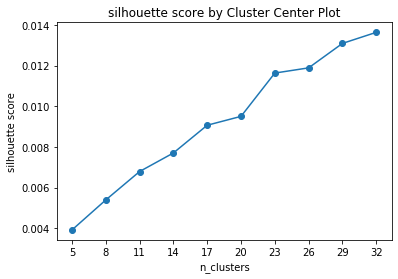

In [130]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)
ax.plot(iters, silhouette, marker='o')
ax.set_xlabel('n_clusters')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('silhouette score')
ax.set_title('silhouette score by Cluster Center Plot')

Ici, nous choisissons de selectionner une autre metrique plus pércise que la silhouette car il est difficile de déterminer le max de notre courbe. 

### Calinski-Harabasz Index

L'indice de Calinski-Harabasz est basé sur l'idée que les clusters qui sont très compacts et bien espacés les uns des autres sont de bons clusters. L'indice est calculé en divisant la variance des sommes des carrés des distances des objets individuels à leur centre de cluster par la somme des carrés de la distance entre les centres de cluster.


Il est également connu sous le nom de critère du rapport de variance.

Le score est défini comme le rapport entre la dispersion intra-groupe et la dispersion inter-groupes.

Le score est plus élevé lorsque les clusters sont denses et bien séparés, ce qui correspond à un concept standard de cluster, nous entrainerons donc un Kmeans qui maximisera le Calinski-Harabasz score


In [141]:
kmeans_text = X.toarray()


iters = range(5, 35, 3)
silhouette = []
for n_clusters in iters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(kmeans_text)
    centers = clusterer.cluster_centers_



    score = metrics.calinski_harabasz_score(kmeans_text, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 5, silhouette score is 20.44954013385992
For n_clusters = 8, silhouette score is 18.65733747784582
For n_clusters = 11, silhouette score is 18.27685767244816
For n_clusters = 14, silhouette score is 16.978106116747217
For n_clusters = 17, silhouette score is 15.40079657972912
For n_clusters = 20, silhouette score is 15.461399683798527
For n_clusters = 23, silhouette score is 13.892686902642364
For n_clusters = 26, silhouette score is 14.037186114492547
For n_clusters = 29, silhouette score is 13.506066688387358
For n_clusters = 32, silhouette score is 13.004085996389088


Text(0.5, 1.0, 'Calinski-Harabasz Index')

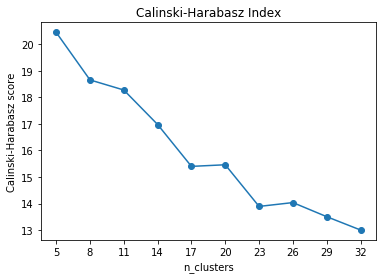

In [142]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1)
ax.plot(iters, silhouette, marker='o')
ax.set_xlabel('n_clusters')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('Calinski-Harabasz score')
ax.set_title('Calinski-Harabasz Index')

On observe que dans notre cas, 8 clusters maximisent le Calinski-Harabasz score, nous décidons de conserver 8 cluster dans l'entrainement de notre Kmeans.

In [143]:
clf_kmeans = KMeans(n_clusters=8)
clf_train = clf_kmeans.fit_predict(X.toarray())

score = metrics.calinski_harabasz_score(X.toarray(),clf_train)

In [144]:
score

19.43904879938856

In [155]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nTopic {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X, clf_train, vectorizer.get_feature_names(), 10)


Topic 0
live,right,obama,watch,thing,man,year,time,say,donald_trump

Topic 1
idea,animal,wear,home,style,good,look,dress,week,photo

Topic 2
matter,easy,black,work,live,love,way,change,save,life

Topic 3
mom,know,world,kid,love,way,day,video,make,good

Topic 4
album,good,try,jersey,trailer,parent,video,resolution,year,new

Topic 5
climate,voter,melania,order,ban,president,clinton,administration,say,trump

Topic 6
tell,qa,change,week,business,day,tweet,funny,man,woman

Topic 7
love,parent,successful,victim,want,way,make,child,help,people


No handles with labels found to put in legend.


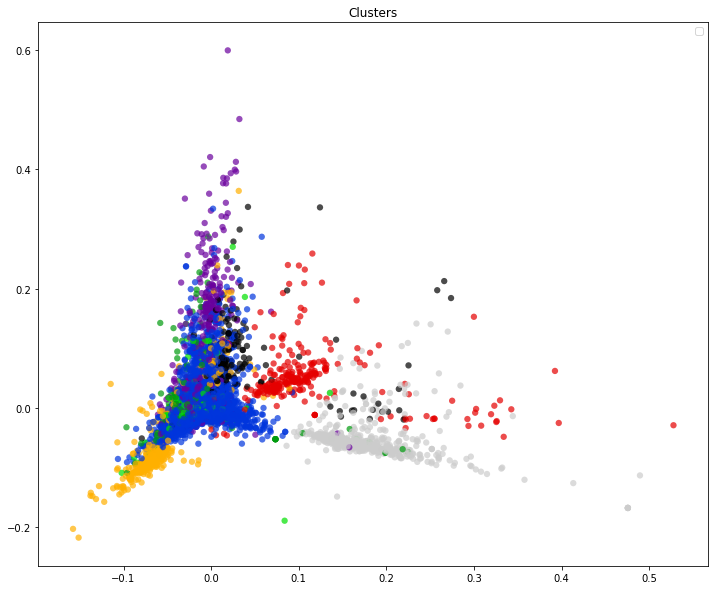

In [163]:
from sklearn.decomposition import PCA

y_kmeans = clf_kmeans.fit_predict(X.toarray())
X_pca = PCA(2).fit_transform(X.toarray())

plt.figure(figsize=(12,10))
plt.scatter(X_pca[:,0],X_pca[:,1], c=y_kmeans, edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title("Clusters")
plt.legend()
plt.show()

On observe que malgré la densité de données et la compactness des clusters, ceux-ci paraissent assez bien séparés. Une amélioration possible de cette visualisation aurait été de la projetter en 3D afin de savoir si les outlyers d'un clusters en sont vraiment.